In [9]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_stage2_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [11]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [12]:
coverage_df = coverage_df.drop(["Tree val", "Naive"], axis=1)
coverage_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,0.857143,0.833333,0.833333,1.000000,1.000000,0.833333
1,1.000000,0.833333,0.833333,0.833333,1.000000,0.833333
2,1.000000,0.833333,1.000000,1.000000,1.000000,0.833333
3,0.714286,1.000000,1.000000,1.000000,0.800000,0.833333
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
28,1.000000,1.000000,0.714286,1.000000,1.000000,1.000000
29,1.000000,1.000000,0.666667,0.833333,1.000000,0.714286
30,1.000000,0.833333,1.000000,1.000000,1.000000,1.000000
31,1.000000,1.000000,0.833333,0.666667,1.000000,0.833333


In [13]:
length_df = length_df.drop(["Tree val", "Naive"], axis=1)
length_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,3.487844,6.056615,4.455889,4.120869,3.450734,3.135643
1,2.882648,6.035534,4.333766,3.715618,3.354189,3.146437
2,3.967230,5.971588,4.428684,3.718218,3.389758,3.096876
3,3.057457,5.688707,4.188488,3.560920,2.967788,2.980155
4,3.041009,5.805983,4.308861,3.638709,3.331755,2.941854
...,...,...,...,...,...,...
28,115.021132,5.827558,4.570302,3.667751,3.270454,3.044774
29,5.068354,5.348902,4.011922,3.387230,3.051728,3.060040
30,3.133907,5.870977,4.350848,3.719649,3.280187,3.064055
31,3.713623,5.621284,4.178317,3.530384,3.163219,2.927907


In [14]:
MSE_df = MSE_df.drop(["Tree val", "Naive"], axis=1)
MSE_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,4.851194,5.683069,6.006849,5.697434,5.768301,6.032551
1,5.042391,4.789536,4.611548,5.083833,5.110161,5.569554
2,4.820912,4.587963,4.878662,5.089529,5.135086,5.295117
3,5.888504,5.589437,5.602681,5.487846,6.019092,7.214700
4,3.863959,4.172596,4.174936,4.415361,4.659936,4.359104
...,...,...,...,...,...,...
28,4.878663,5.296111,4.702159,5.541466,5.761255,5.477975
29,4.566542,4.547045,4.789897,5.005010,4.786183,4.336879
30,3.762577,3.915444,4.031842,3.998210,3.845442,4.089901
31,4.687465,4.498594,5.826250,5.127940,4.803473,5.590958


In [15]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 RRT(1)     0.933539
UV(0.1)    0.891240
UV(0.2)    0.880747
UV(0.3)    0.898310
UV(0.4)    0.899427
UV(0.5)    0.895429
dtype: float64
Length :
 RRT(1)     6.410707
UV(0.1)    5.821677
UV(0.2)    4.310713
UV(0.3)    3.661404
UV(0.4)    3.292011
UV(0.5)    3.057407
dtype: float64
MSE :
 RRT(1)     4.776618
UV(0.1)    4.812150
UV(0.2)    4.926350
UV(0.3)    5.079297
UV(0.4)    5.150564
UV(0.5)    5.339473
dtype: float64


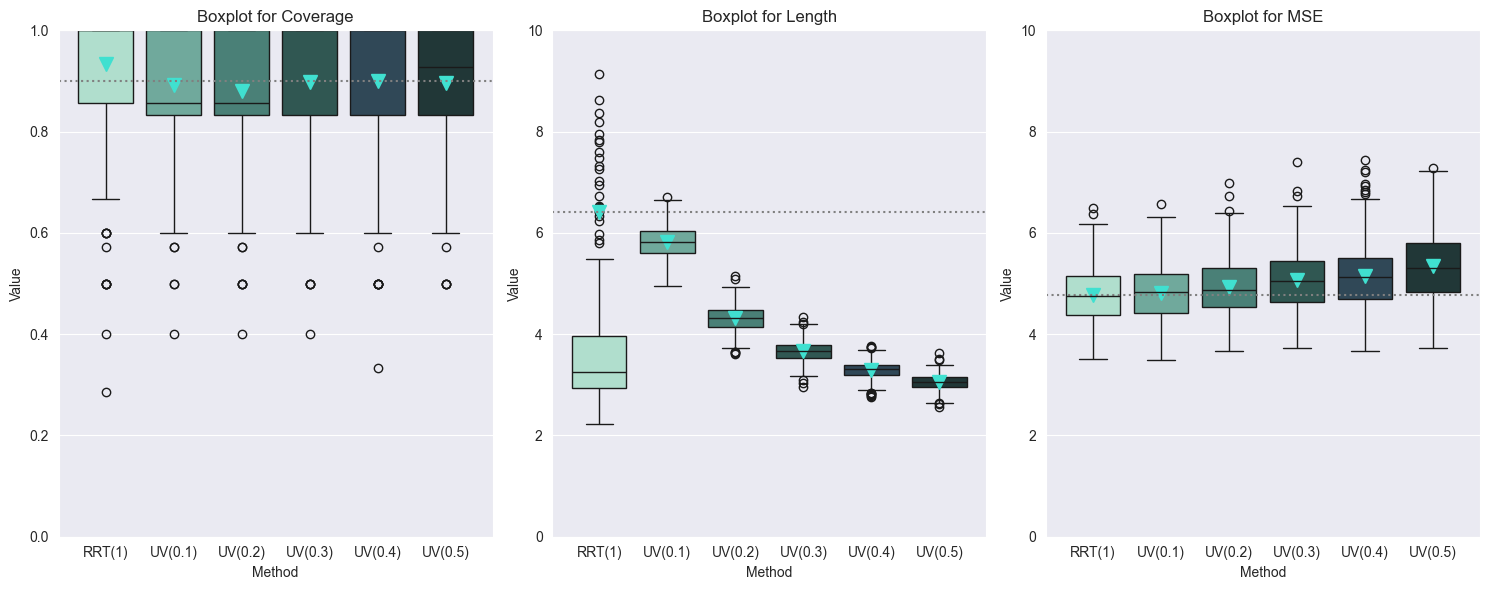

In [16]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=10,
         len_baseline_key="RRT(1)",
         MSE_baseline_key="RRT(1)",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "UV(0.1)", "UV(0.2)", "UV(0.3)", "UV(0.4)", "UV(0.5)"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#1E3A3A"])